# GTEx PCA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm.auto import tqdm
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# data_path = '../../data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz'
# data_path = '../../data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct'
data_path = '../../data/GTEx_v7_tpm_first5k_rand.gct'
data = parse(data_path)

In [3]:
# remove nan values from row_metadata (description column)
data.row_metadata_df.dropna(inplace=True)
# remove the entries of .data_df where nan values are in row_metadata
data.data_df = data.data_df.loc[data.row_metadata_df.index]

In [4]:
df = data.data_df
df

cid,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
rid,,,,,,,,,,,,,,,,,,,,,
ENSG00000204380.2,1.734000,1.05600,1.147000,1.672000,2.21300,1.4650,1.954000,1.161000,0.97310,2.858000,...,0.20320,0.048830,0.05889,0.071670,0.064340,0.163300,0.018230,0.01424,0.104600,0.127100
ENSG00000265514.1,0.000000,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
ENSG00000183696.9,110.400002,52.16000,27.740000,86.870003,30.99000,31.9900,57.299999,21.780001,29.90000,33.119999,...,47.59000,243.600006,192.00000,69.959999,207.800003,69.269997,397.600006,55.66000,158.600006,141.399994
ENSG00000115297.9,0.185200,0.00000,0.013510,0.000000,0.00000,0.0000,0.000000,0.040060,0.01554,0.000000,...,0.02315,0.010430,0.00000,0.000000,0.015700,0.074370,0.000000,0.01217,0.041240,0.000000
ENSG00000242435.1,0.652000,0.00000,0.507400,0.561700,0.15910,0.2798,0.185400,0.376100,0.43760,1.034000,...,0.00000,0.391600,0.15740,0.287400,1.179000,0.872800,0.000000,0.11420,0.129100,1.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165023.5,0.084150,0.07887,0.032740,0.516600,0.04108,0.0632,0.047870,0.048540,0.17890,0.077860,...,0.04208,0.056860,0.15240,0.000000,0.066600,0.157700,0.000000,0.05160,0.141600,0.075200
ENSG00000266052.1,0.000000,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
ENSG00000205670.6,13.260000,13.01000,16.889999,10.920000,8.96900,10.2800,10.050000,20.690001,8.15800,12.730000,...,0.91690,5.391000,1.56700,2.083000,1.372000,1.851000,1.424000,1.91500,2.555000,2.505000


In [5]:
# df = df.T  # Transpose for samples as rows
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
tensor_data = torch.FloatTensor(scaled_data)

In [6]:
tensor_data.shape

torch.Size([5000, 11688])

In [7]:
final_df = pd.DataFrame(tensor_data.numpy(), index=df.index, columns=df.columns)
final_df.index.names = ['gene_id']

In [8]:
final_df

cid,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000204380.2,-0.131422,-0.133552,-0.114792,-0.113290,-0.090511,-0.106679,-0.112888,-0.118415,-0.100195,-0.098472,...,-0.100682,-0.107148,-0.101972,-0.087774,-0.089884,-0.110266,-0.096875,-0.093164,-0.100779,-0.108599
ENSG00000265514.1,-0.148965,-0.144431,-0.125452,-0.128385,-0.116012,-0.122463,-0.134258,-0.128100,-0.109036,-0.131323,...,-0.104830,-0.107551,-0.102612,-0.088569,-0.090349,-0.112196,-0.097005,-0.093312,-0.101751,-0.109546
ENSG00000183696.9,0.967971,0.392949,0.132345,0.655894,0.241092,0.222189,0.492420,0.053593,0.162617,0.249377,...,0.866793,1.904293,1.984438,0.687319,1.412027,0.706221,2.729956,0.488261,1.371876,0.943481
ENSG00000115297.9,-0.147092,-0.144431,-0.125326,-0.128385,-0.116012,-0.122463,-0.134258,-0.127766,-0.108895,-0.131323,...,-0.104358,-0.107465,-0.102612,-0.088569,-0.090235,-0.111317,-0.097005,-0.093185,-0.101368,-0.109546
ENSG00000242435.1,-0.142369,-0.144431,-0.120736,-0.123314,-0.114178,-0.119448,-0.132230,-0.124962,-0.105060,-0.119438,...,-0.104830,-0.104317,-0.100901,-0.085381,-0.081825,-0.101884,-0.097005,-0.092119,-0.100551,-0.101950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165023.5,-0.148114,-0.143619,-0.125147,-0.123721,-0.115538,-0.121782,-0.133734,-0.127695,-0.107411,-0.130428,...,-0.103971,-0.107082,-0.100956,-0.088569,-0.089867,-0.110333,-0.097005,-0.092773,-0.100435,-0.108986
ENSG00000266052.1,-0.148965,-0.144431,-0.125452,-0.128385,-0.116012,-0.122463,-0.134258,-0.128100,-0.109036,-0.131323,...,-0.104830,-0.107551,-0.102612,-0.088569,-0.090349,-0.112196,-0.097005,-0.093312,-0.101751,-0.109546
ENSG00000205670.6,-0.014811,-0.010395,0.031513,-0.029797,-0.012660,-0.011709,-0.024343,0.044500,-0.034918,0.015003,...,-0.086111,-0.063028,-0.085579,-0.065467,-0.080429,-0.090326,-0.086880,-0.073303,-0.078011,-0.090891


In [9]:
# Perform PCA
num_pc = 100
pca = PCA(n_components=num_pc)
pca_result = pca.fit_transform(final_df)
pca_columns = [f'PC{i}' for i in range(1, num_pc+1)]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns, index=final_df.index)

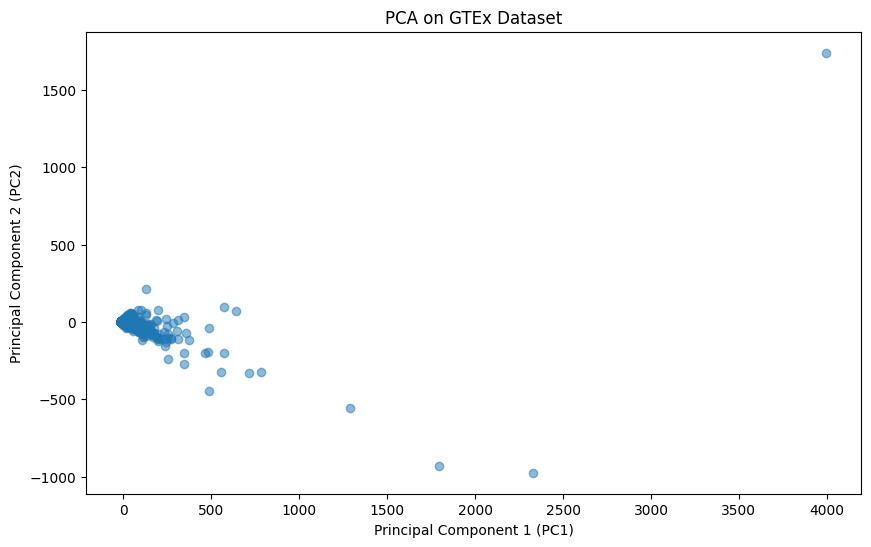

In [10]:
# Plot the PCA results for the first two components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA on GTEx Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

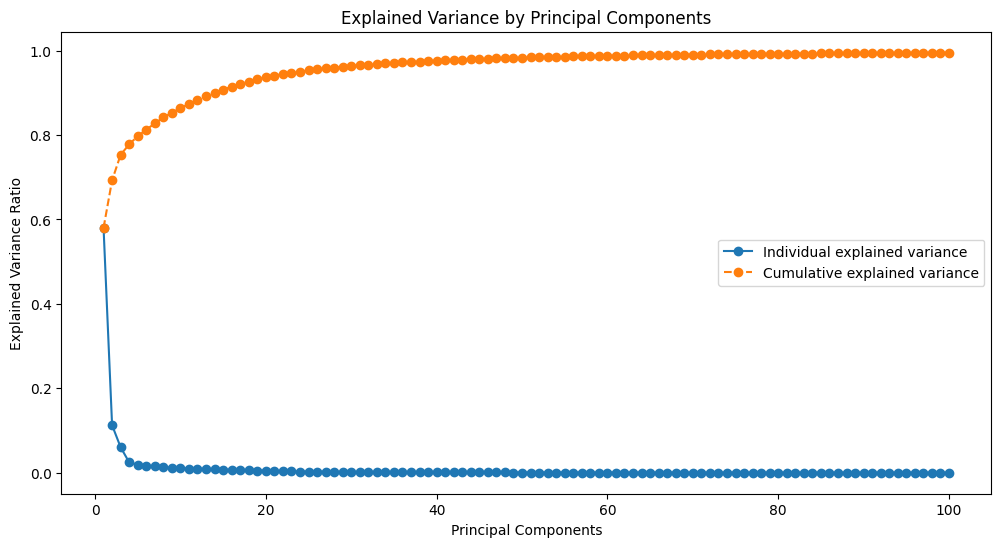

In [11]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance for each principal component as a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

In [12]:
# Extract embeddings
embedding_dim = 64
embeddings = pca_df[[f'PC{i}' for i in range(1, embedding_dim+1)]]

embeddings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000204380.2,-11.444076,2.214697,0.403387,-0.473367,0.155778,-0.038179,-0.083922,-0.261664,0.881155,-0.261164,...,0.053160,0.025038,0.183485,-0.104045,-0.000580,0.035678,0.066887,-0.063483,0.001918,0.078079
ENSG00000265514.1,-12.586504,2.584671,0.259693,-0.748829,0.068165,-0.025411,-0.105743,-0.109137,0.931237,-0.364536,...,0.134411,0.025051,0.100357,-0.049761,-0.024192,-0.027550,-0.075179,-0.008967,0.090319,0.043576
ENSG00000183696.9,23.313955,-14.868663,-2.510663,-14.954608,24.633200,4.924134,-5.015983,13.224004,-7.857205,3.296737,...,-3.449555,-2.344337,1.074588,-3.078908,-1.773488,2.713141,1.709083,2.789221,2.704641,0.850577
ENSG00000115297.9,-12.313880,2.653151,0.251395,-0.720083,-0.006696,-0.042775,-0.092655,-0.168333,0.856357,-0.392655,...,0.154399,0.035460,0.085424,-0.024064,0.052923,0.033322,-0.052409,-0.122530,0.100662,-0.024609
ENSG00000242435.1,-12.277049,2.364859,0.515145,-0.757523,0.153774,0.001924,-0.102735,-0.113600,1.009397,-0.335274,...,0.132063,0.015846,0.086155,-0.078549,0.007233,-0.006342,-0.012207,-0.044723,0.059886,0.003527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165023.5,3.707931,18.179392,-0.730905,2.007968,-1.174206,-3.105570,-0.369487,-9.382309,-27.081612,5.209289,...,-3.148497,-0.385454,0.034638,-0.205486,-2.795644,-0.446885,-2.511616,-1.507201,0.951407,0.659940
ENSG00000266052.1,-12.659645,2.531429,0.257844,-0.784865,0.117394,-0.019903,-0.106539,-0.073227,0.999967,-0.281757,...,0.154587,0.024300,0.084647,-0.063258,-0.000999,-0.021824,-0.048973,-0.034450,0.068886,0.004147
ENSG00000205670.6,3.837897,1.809079,-1.878294,2.431991,-1.989821,-1.404669,0.869541,-1.076396,-2.293293,1.030964,...,0.285174,-0.157164,0.098000,0.197747,-0.384215,-0.660348,-0.165807,-0.115973,-0.283561,-0.192346


In [13]:
embeddings.index

Index(['ENSG00000204380.2', 'ENSG00000265514.1', 'ENSG00000183696.9',
       'ENSG00000115297.9', 'ENSG00000242435.1', 'ENSG00000226419.2',
       'ENSG00000240056.2', 'ENSG00000243969.1', 'ENSG00000238205.1',
       'ENSG00000225294.1',
       ...
       'ENSG00000252559.1', 'ENSG00000216157.2', 'ENSG00000181609.5',
       'ENSG00000238383.1', 'ENSG00000235554.1', 'ENSG00000165023.5',
       'ENSG00000266052.1', 'ENSG00000205670.6', 'ENSG00000231801.2',
       'ENSG00000251689.1'],
      dtype='object', name='gene_id', length=5000)

In [14]:
# reformat gene_id: drop decimals
embeddings.index = embeddings.index.str.split('.').str[0]
embeddings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000204380,-11.444076,2.214697,0.403387,-0.473367,0.155778,-0.038179,-0.083922,-0.261664,0.881155,-0.261164,...,0.053160,0.025038,0.183485,-0.104045,-0.000580,0.035678,0.066887,-0.063483,0.001918,0.078079
ENSG00000265514,-12.586504,2.584671,0.259693,-0.748829,0.068165,-0.025411,-0.105743,-0.109137,0.931237,-0.364536,...,0.134411,0.025051,0.100357,-0.049761,-0.024192,-0.027550,-0.075179,-0.008967,0.090319,0.043576
ENSG00000183696,23.313955,-14.868663,-2.510663,-14.954608,24.633200,4.924134,-5.015983,13.224004,-7.857205,3.296737,...,-3.449555,-2.344337,1.074588,-3.078908,-1.773488,2.713141,1.709083,2.789221,2.704641,0.850577
ENSG00000115297,-12.313880,2.653151,0.251395,-0.720083,-0.006696,-0.042775,-0.092655,-0.168333,0.856357,-0.392655,...,0.154399,0.035460,0.085424,-0.024064,0.052923,0.033322,-0.052409,-0.122530,0.100662,-0.024609
ENSG00000242435,-12.277049,2.364859,0.515145,-0.757523,0.153774,0.001924,-0.102735,-0.113600,1.009397,-0.335274,...,0.132063,0.015846,0.086155,-0.078549,0.007233,-0.006342,-0.012207,-0.044723,0.059886,0.003527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165023,3.707931,18.179392,-0.730905,2.007968,-1.174206,-3.105570,-0.369487,-9.382309,-27.081612,5.209289,...,-3.148497,-0.385454,0.034638,-0.205486,-2.795644,-0.446885,-2.511616,-1.507201,0.951407,0.659940
ENSG00000266052,-12.659645,2.531429,0.257844,-0.784865,0.117394,-0.019903,-0.106539,-0.073227,0.999967,-0.281757,...,0.154587,0.024300,0.084647,-0.063258,-0.000999,-0.021824,-0.048973,-0.034450,0.068886,0.004147
ENSG00000205670,3.837897,1.809079,-1.878294,2.431991,-1.989821,-1.404669,0.869541,-1.076396,-2.293293,1.030964,...,0.285174,-0.157164,0.098000,0.197747,-0.384215,-0.660348,-0.165807,-0.115973,-0.283561,-0.192346


In [15]:
emb_path = '../../data/GTEx_PCA_d'+str(embedding_dim)+'.tsv'
embeddings.to_csv(emb_path, sep='\t', index=True)